# Lasso in Concrete-ML

this tutorial is going to show you how to use Lasso penalizing linear regression algorithm in Concrete-ml plus Ridge and 
Elastic-net 

**Concrete-ML** is an open-source, privacy-preserving, machine learning inference framework based on fully homomorphic encryption (FHE). It enables data scientists without any prior knowledge of cryptography to automatically turn machine learning models into their FHE equivalent, using familiar APIs from Scikit-learn and PyTorch. 
[documentation website](https://docs.zama.ai/concrete-ml)

![Alt text](https://801304998-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F75MldzZY6YYabEQfXDIR%2Fuploads%2Fgit-blob-bd13f146460dd3096ed0021391be3e4790c18bef%2F3.png?alt=media)

### what is difference between scikit-learn and concrete-ml for creating a ML model?
| Scikit-learn     | Concrete-ML   |
|----------------- |---------------|
| doesn't work on encrypted data             | works on encrypted data         |
 

### How can I apply the same model in sklearn in concrete-ml?
1. preparing dataset 
2. fitting in to the model
3. compiling the model on training set 
4. predict the encrypted data 

let's apply it on Lasso - linear regression penalizing model

In [1]:
# importing the libraries
from sklearn.datasets import make_regression # to create a regression dataset randomly
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from concrete.ml.sklearn import Lasso as ConcreteLasso
import pandas as pd 

/home/mahmoud/anaconda3/envs/fhe/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1. preparing the dataset

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


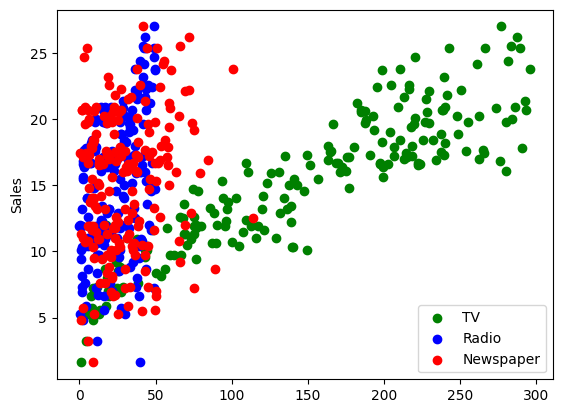

In [3]:
fig = plt.subplot()
plt.scatter(df["TV"], df["Sales"], c='g', label='TV')
plt.scatter(df["Radio"], df["Sales"], c='b', label='Radio')
plt.scatter(df["Newspaper"], df["Sales"], c='r', label='Newspaper')
plt.ylabel("Sales")
plt.legend()
plt.show()

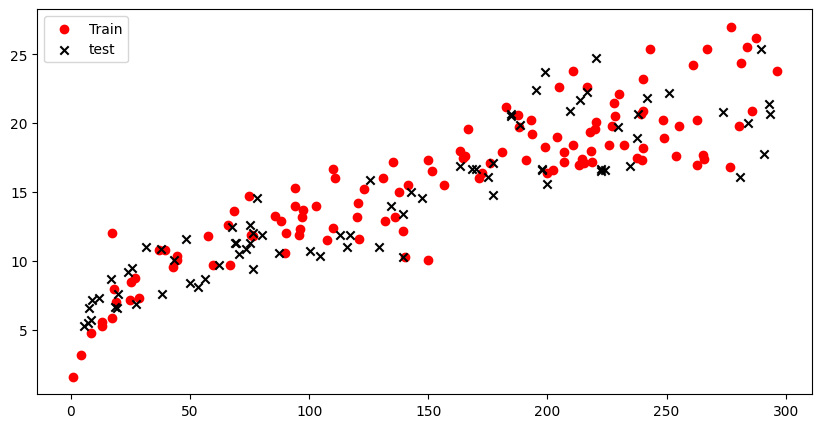

In [4]:
# since in the TV feature resembles a linear relationship we use it as feature
X = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# visualizing the data
fig = plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, marker='o', c='r', label='Train')
plt.scatter(X_test, y_test, marker='x', c='black', label='test')
plt.legend()
plt.show()

#### 2. fitting the Model
here we only have one additional hyper-parameter than sklearn, which is *n_bits*(number of bits). for more information click [here](), and the *alpha* hyperparameter is for degree of penalizing large coefficients; the larger it gets, the more penalization.

In [5]:
lasso = ConcreteLasso(n_bits=4, alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, n_bits=4)

#### 3. compling the model on training data
to predict on encrypted data we first we need to compile the model to its FHE(Fully Homorphoic Encrypted) equivalent. then we just need to keys to be generated for decrypting processed data for client.

In [ ]:
lasso_fhe = lasso.compile(X_train)

# here we generate keys
lasso_fhe.graph.maximum_integer_bit_width() # it's just a minor requirment for generating keys 
lasso_fhe.client.keygen(force=False) # this will create secret key and evaluation key

#### 4. predicting on encrypted data

In [ ]:
# "excute_in_fhe" will encrypt data and then uses the model to predict on encrypted data.
y_pred = lasso.predict(X_test, execute_in_fhe=True)
print(y_pred[:10])

But on the client side, there's no model to use above parameter to encrypt data. 
instead we encrypt the client data and send it to server to 
be processed. for more information click [here](https://docs.zama.ai/concrete-ml/advanced-topics/client_server)
![Alt-text](https://801304998-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F75MldzZY6YYabEQfXDIR%2Fuploads%2Fgit-blob-f0c968fefec32658440dbc5814e2082b579c6200%2Fconcretemlgraph3.jpg?alt=media)

Here now we create three penalizing models Lasso, Ridge, and ElasticNet. then, we compare
the scoring resutls. since we have Lasso ready, then we go only for Ridge and ElasticNet. 

### Ridge

In [ ]:
from concrete.ml.sklearn import Ridge as ConcreteRidge
# step one: preparing data, since we prepared data before we skip it. 

# step two: training model 
ridge = ConcreteRidge(n_bits=4, alpha=0.1)
ridge.fit(X_train, y_train)

# step three: compiling the model 
ridge_fhe = ridge.compile(X_train)
ridge_fhe.graph.maximum_integer_bit_width()
ridge_fhe.keygen(force=False)

# step four: predicting on encrypted data
y_pred_ridge = ridge.predict(X_test, execute_in_fhe=True)
print(y_pred_ridge[:10])

### ElasticNet

In [ ]:
from concrete.ml.sklearn import ElasticNet as ConcreteElasticNet

# this time without commenting the steps 

elasticNet = ConcreteElasticNet(n_bits=4, alpha=0.1)
elasticNet.fit(X_train, y_train)

elasticNet_fhe = elasticNet.compile(X_train)
elasticNet_fhe.graph.maximum_integer_bit_width()
elasticNet_fhe.keygen(force=False)

y_pred_elastic = elasticNet.predict(X_test, execute_in_fhe=True)
print(y_pred_elastic[:10])

### Comparing the scoring results

In [ ]:
from sklearn.metrics import r2_score as r2 # it is our scoring function which R-squared

print(f"Lasso accuracy: {r2(y_test, y_pred)}") # I hope you remember we didn't give the y_pred lasso suffix
print(f"Ridge Accuracy: {r2(y_test, y_pred_ridge)}")
print(f"ElasticNet Accuracy: {r2(y_test, y_pred_elastic)}")

In [ ]:
from sklearn.metrics import mean_squared_error as mse 

# taking root mean squared error
print(f"Lasso Mean squared errorr: {mse(y_test, y_pred, squared=False)}") 
print(f"Ridge Mean squared errorr: {mse(y_test, y_pred_ridge, squared=False)}") 
print(f"ElasticNet Mean squared errorr: {mse(y_test, y_pred_elastic, squared=False)}") 